# Прогнозирование оценки учеников

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [13]:
DATA_FOLDER = "data/"

train_por = pd.read_csv(DATA_FOLDER + "student-por.csv")
train_math = pd.read_csv(DATA_FOLDER + "student-mat.csv")

In [14]:
train_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [15]:
train_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [16]:
for column in train_math.columns:
    print(f'{column}: {train_math[column].unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

# Исследование данных

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/2054561948.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="sex", kind="count",palette="magma", data=train_math, height = 6)


Text(0.5, 1.0, 'Гендер : F - девушка,M - мужчина')

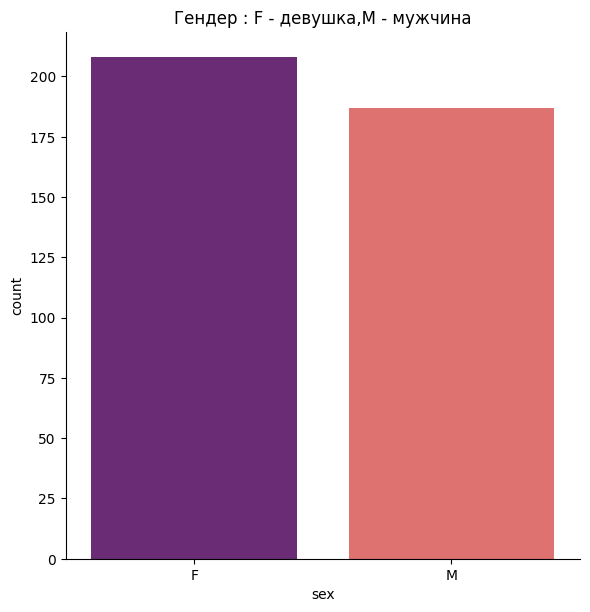

In [17]:
sns.catplot(x="sex", kind="count",palette="magma", data=train_math, height = 6)
plt.title("Гендер : F - девушка,M - мужчина")

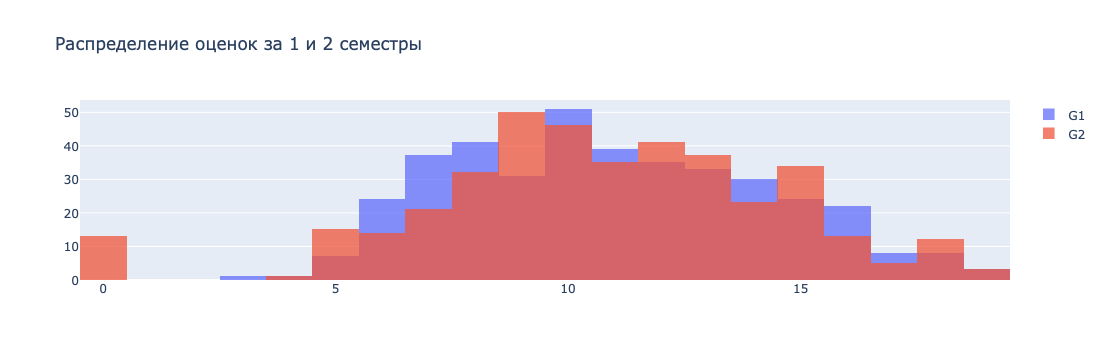

In [67]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_math['G1'], name="G1"))
fig.add_trace(go.Histogram(x=train_math['G2'], name="G2"))


fig.update_layout(barmode='overlay')

fig.update_layout(title_text='Распределение оценок за 1 и 2 семестры')

fig.update_traces(opacity=0.75)
fig.show()

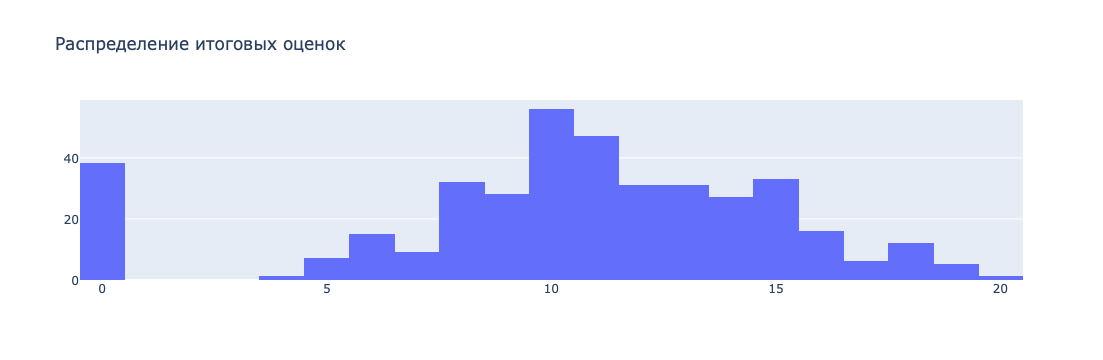

In [66]:
fig = go.Figure(data=[go.Histogram(x=train_math['G3'])])

fig.update_layout(title_text='Распределение итоговых оценок')

fig.show()

Как видно из графика, есть целых 38 учеников с финальной оценкой равной 0. Скорее всего это люди, которые были исключены в предыдущих семестрах или ушли по другим причинам.

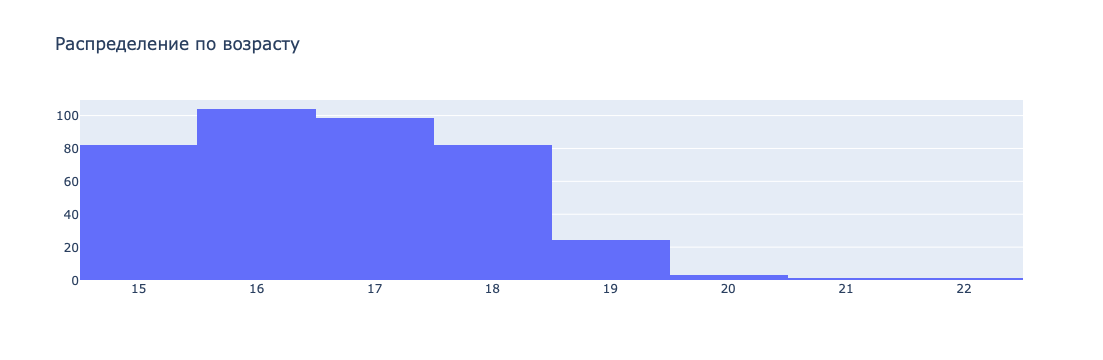

In [65]:
fig = go.Figure(data=[go.Histogram(x=train_math['age'])])

fig.update_layout(title_text='Распределение по возрасту')

fig.show()

## Влияние образования родителей на успеваемость учеников

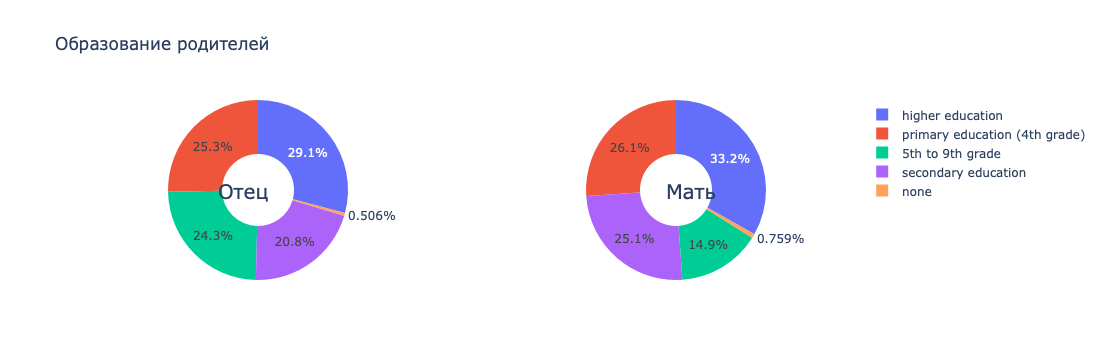

In [21]:
F_edu = train_math[["Fedu", "G3"]].copy()
M_edu = train_math[["Medu", "G3"]].copy()
replace = {0: "none", 1: "primary education (4th grade)", 2: "5th to 9th grade",
           3: "secondary education", 4: "higher education"}

F_edu["Fedu"] = F_edu["Fedu"].replace(replace)
M_edu["Medu"] = M_edu["Medu"].replace(replace)


labels_F = F_edu["Fedu"].unique().tolist()
counts_F = F_edu["Fedu"].value_counts().tolist()

labels_M = M_edu["Medu"].unique().tolist()
counts_M = M_edu["Medu"].value_counts().tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_F, values=counts_F, name="Обр. отца", scalegroup="one"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_M, values=counts_M, name="Обр. матери", scalegroup="one"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text='Образование родителей',
                 annotations=[dict(text='Отец', x=0.17, y=0.5, font_size=20, showarrow=False),
                 dict(text='Mать', x=0.83, y=0.5, font_size=20, showarrow=False)])

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/4245619452.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/4245619452.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от образования родителей (Мать)'}, xlabel='G3', ylabel='Medu'>

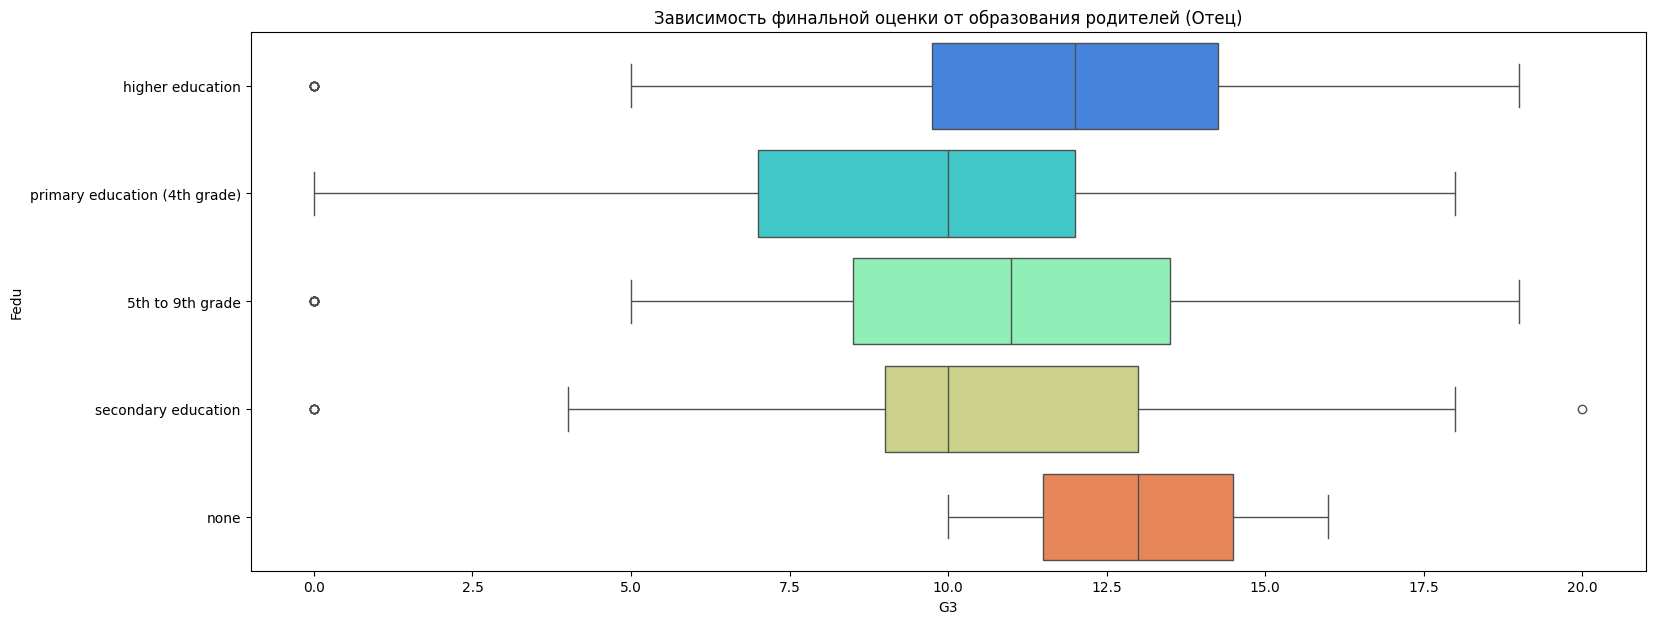

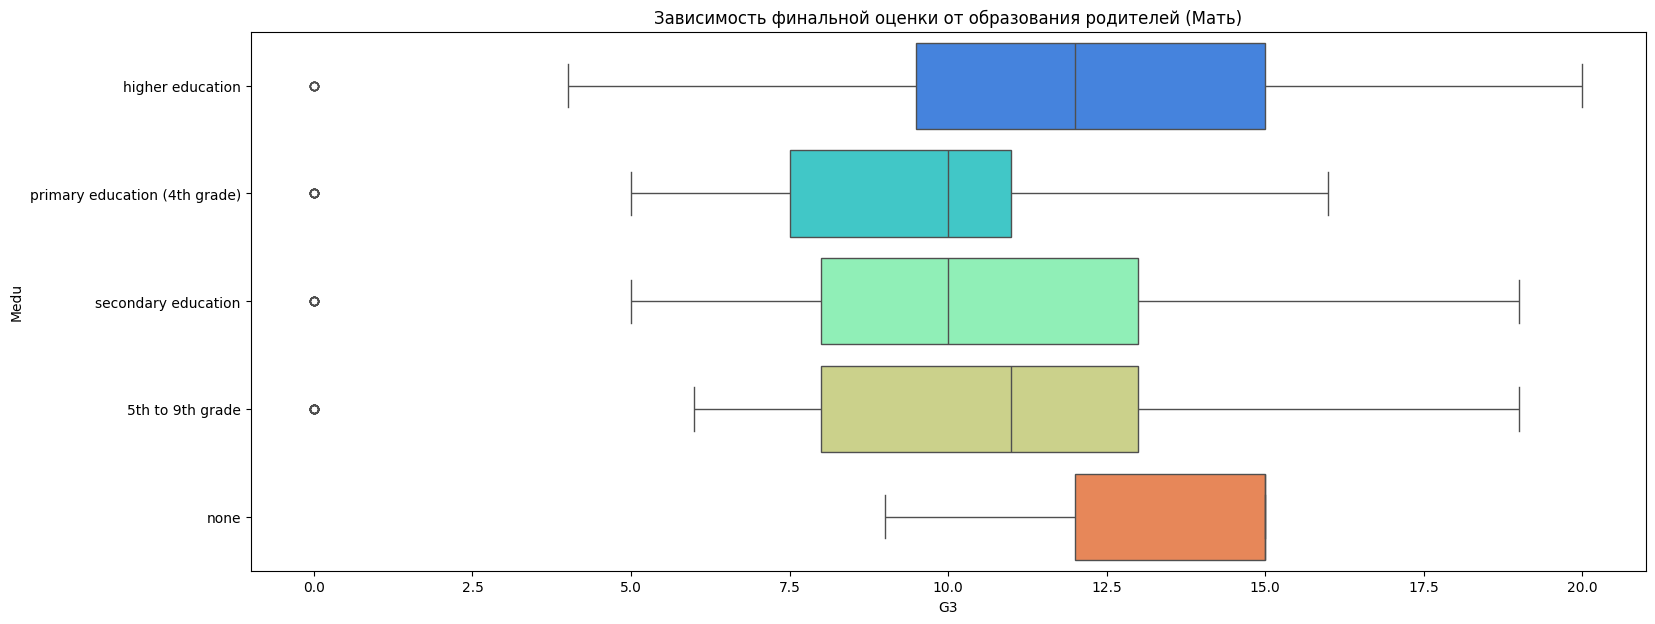

In [22]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от образования родителей (Отец)")
sns.boxplot(y="Fedu", x="G3", data = F_edu , orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от образования родителей (Мать)")
sns.boxplot(y="Medu", x="G3", data = M_edu , orient="h", palette = 'rainbow')

Интересно, что у родителей без образования дети получают самые высоки оценки, из-за малого количества данных такого рода это можно посчитать выбросом.У родителей с высшим образованием дети имеют лучшие оценки, чем другие.

## Влияние места работы родителей на успеваемость учеников

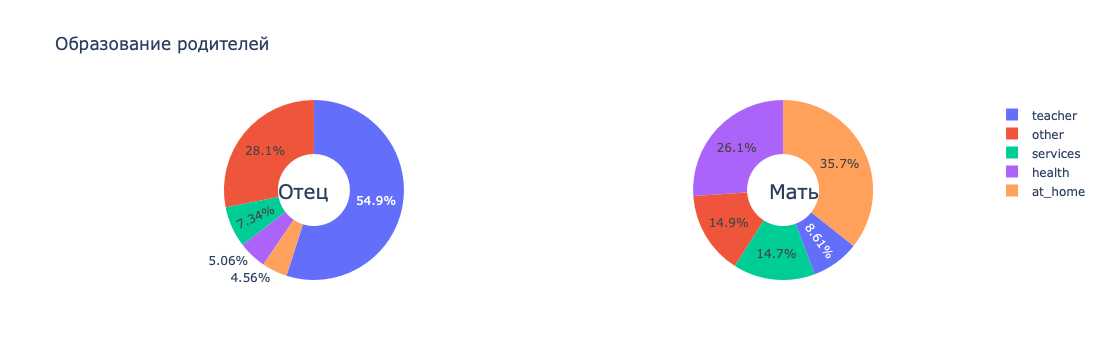

In [23]:
labels_F = train_math["Fjob"].unique().tolist()
counts_F = train_math["Fjob"].value_counts().tolist()

labels_M = train_math["Mjob"].unique().tolist()
counts_M = train_math["Mjob"].value_counts().tolist()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels_F, values=counts_F, name="Раб. отца", scalegroup="one"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_M, values=counts_M, name="Раб. матери", scalegroup="one"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text='Образование родителей',
                 annotations=[dict(text='Отец', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Mать', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/329267303.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/329267303.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от работы родителей (Мать)'}, xlabel='G3', ylabel='Mjob'>

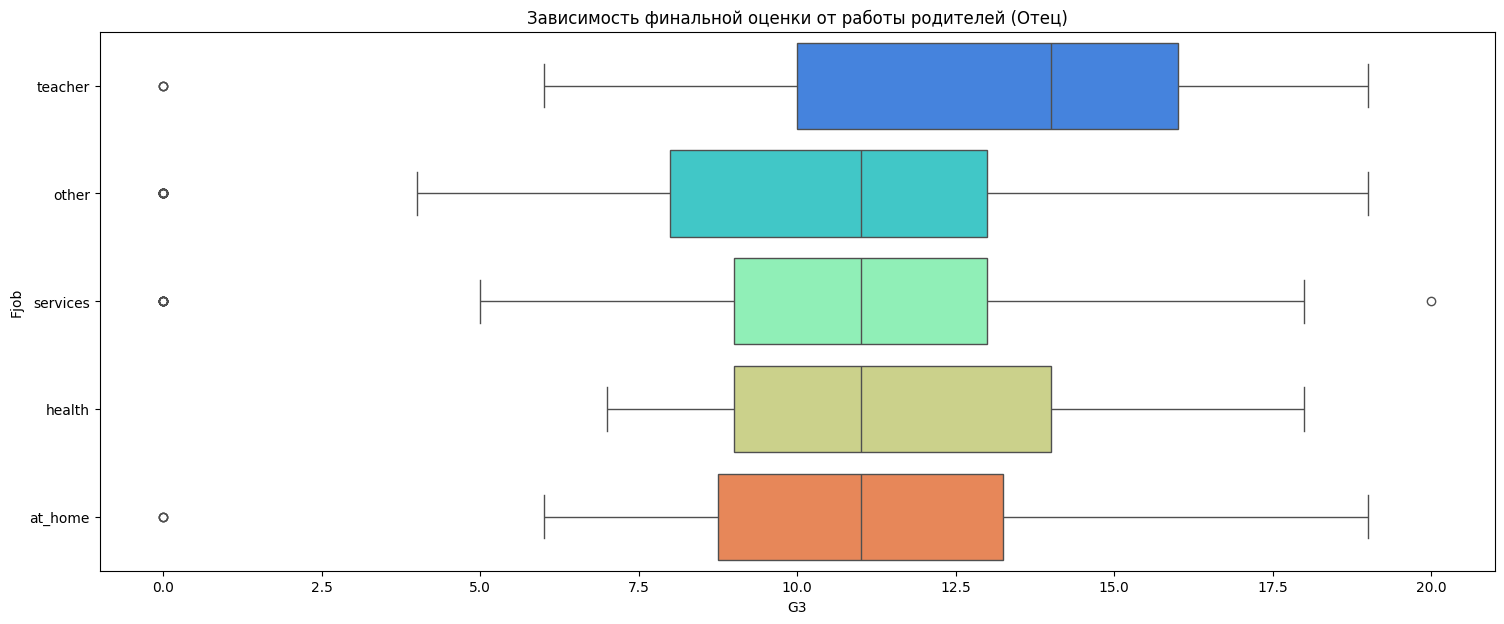

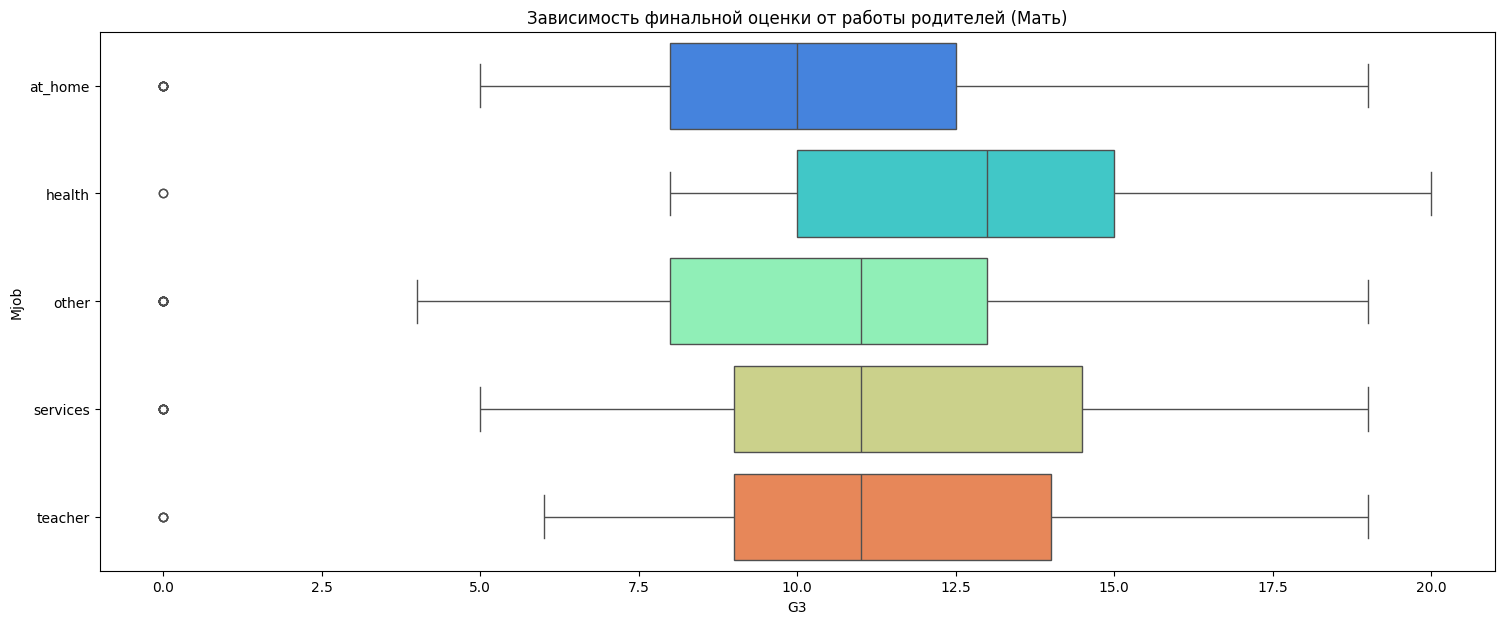

In [24]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от работы родителей (Отец)")
sns.boxplot(y="Fjob", x="G3", data = train_math , orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от работы родителей (Мать)")
sns.boxplot(y="Mjob", x="G3", data = train_math , orient="h", palette = 'rainbow')

Интересно, что в наших данных такое большое количество отцов работает учителями.

## Влияние отношений внутри семьи на успеваемость ученика

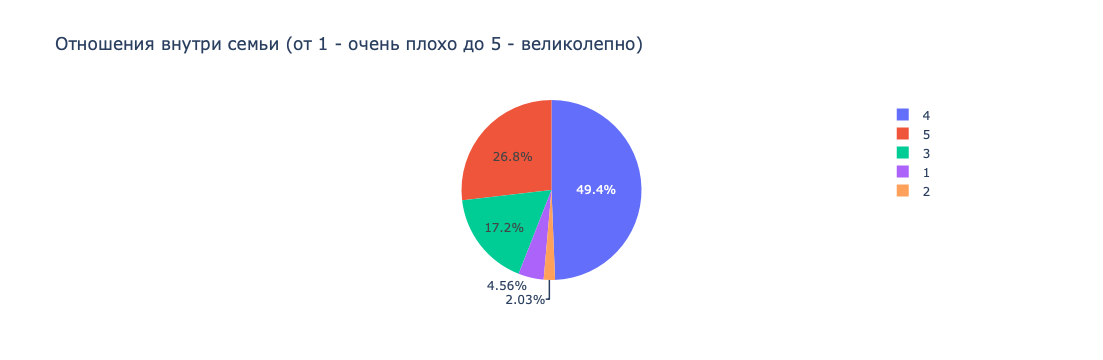

In [25]:
labels = train_math["famrel"].unique().tolist()
counts = train_math["famrel"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Отношения внутри семьи (от 1 - очень плохо до 5 - великолепно)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/2735795006.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от отношений внутри семьи'}, xlabel='G3', ylabel='famrel'>

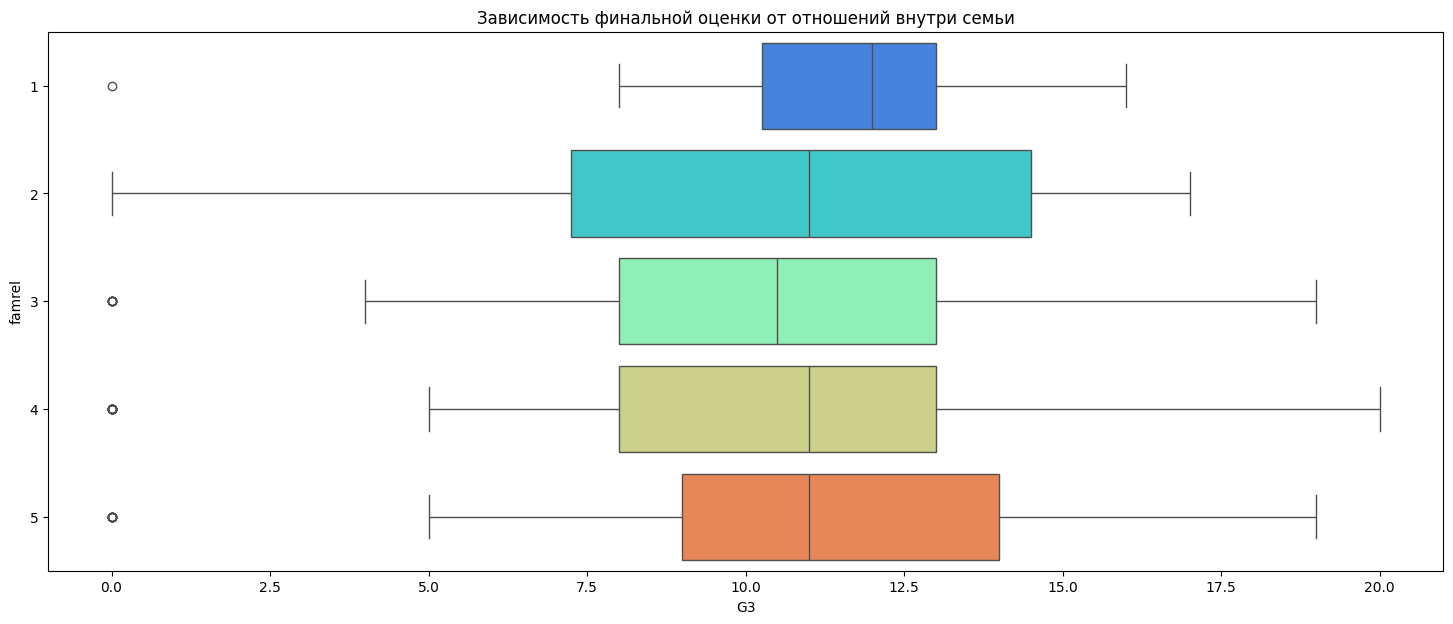

In [26]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от отношений внутри семьи")
sns.boxplot(y="famrel", x="G3", data = train_math , orient="h", palette = 'rainbow')

## Влияние времени проведенного за учебой на успеваемость и здоровье

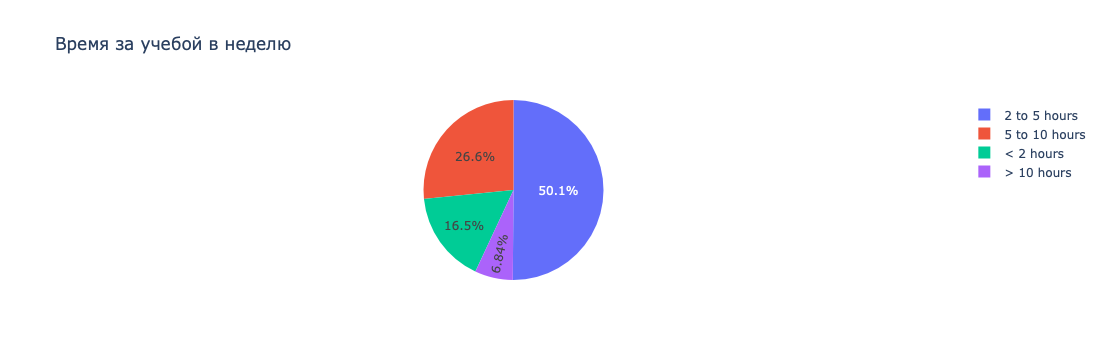

In [27]:
study_time = train_math[["studytime", "G3", "health"]].copy()
replace = {1: "< 2 hours", 2: "2 to 5 hours",
           3: "5 to 10 hours", 4: "> 10 hours"}

study_time["studytime"] = study_time["studytime"].replace(replace)


labels = study_time["studytime"].unique().tolist()
counts = study_time["studytime"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Время за учебой в неделю')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/687599592.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от времени за учебой'}, xlabel='G3', ylabel='studytime'>

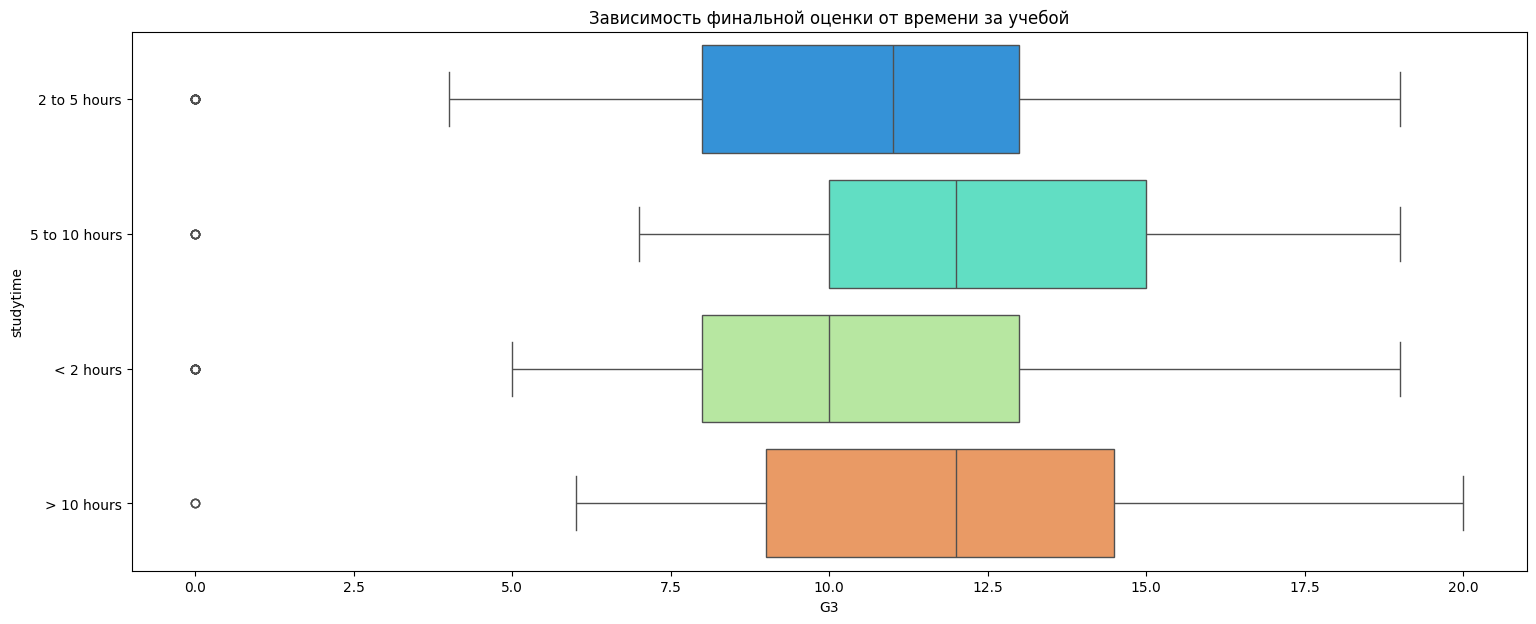

In [28]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от времени за учебой")
sns.boxplot(y="studytime", x="G3", data = study_time , orient="h", palette = 'rainbow')

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/3360649580.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость здоровья от времени за учебой'}, xlabel='health', ylabel='studytime'>

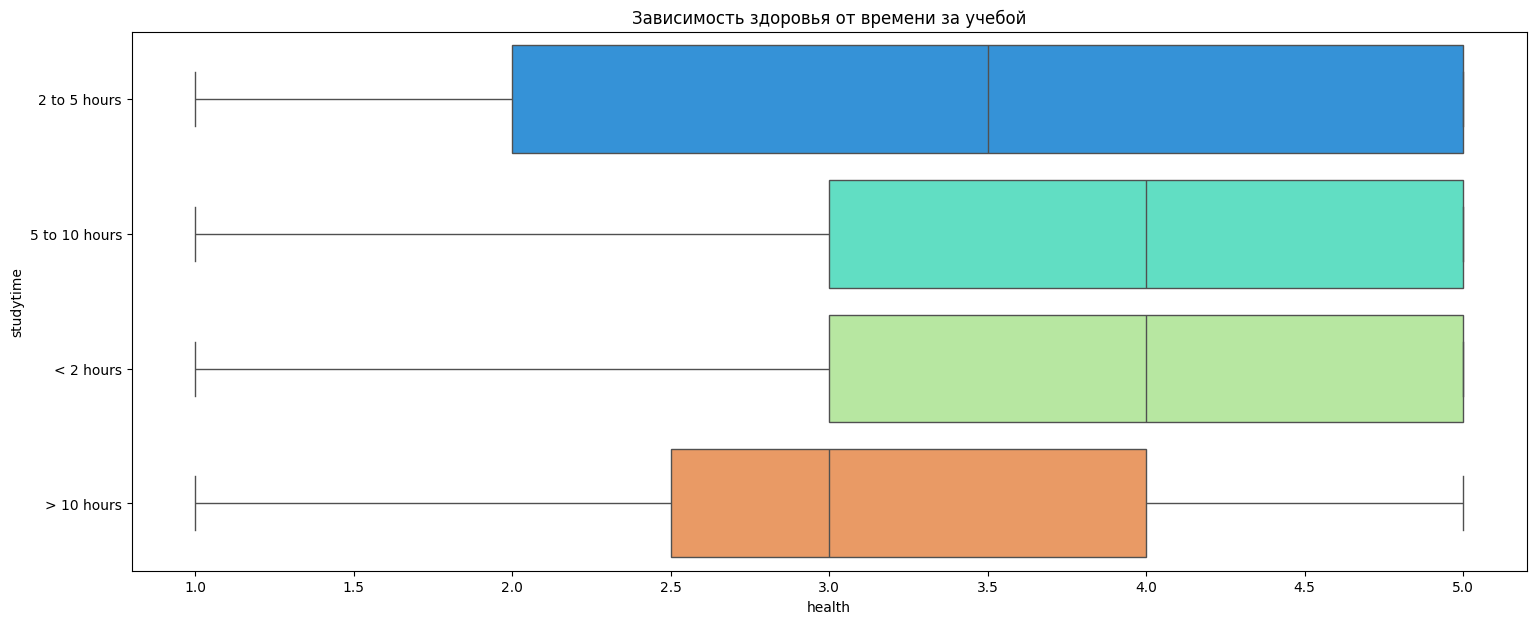

In [29]:
plt.figure(figsize=(18,7))
plt.title("Зависимость здоровья от времени за учебой")
sns.boxplot(y="studytime", x="health", data = study_time , orient="h", palette = 'rainbow')

Очевидно, что время, уделенное учеником сильно влияет на итоговую оценку. Но на графике видно, что разница между 5-10 часами и больше чем 10 часов не велика, 5-10 часов даже немного превосходит. Отсюда можно сделать вывод, что учиться много полезно, но если переусердствовать, то это не скажется хорошо на учебе и на здоровье.

## Влияние здоровья на учпеваемось учеников

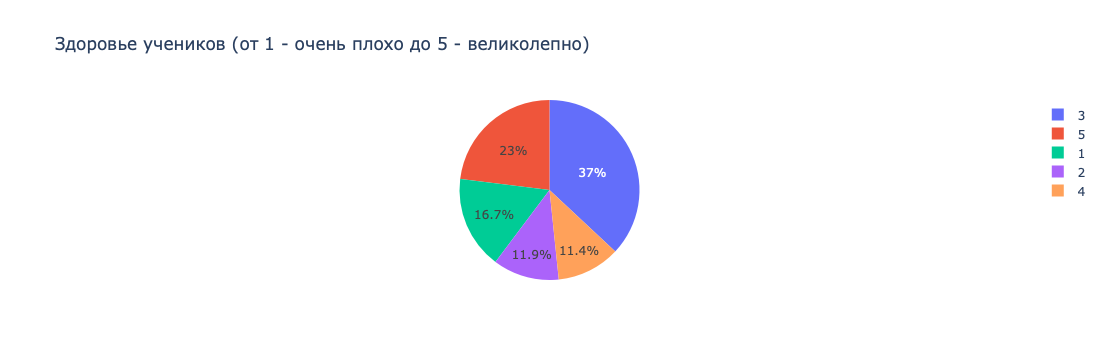

In [30]:
health = train_math[["health", "G3"]].copy()



labels = health["health"].unique().tolist()
counts = health["health"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Здоровье учеников (от 1 - очень плохо до 5 - великолепно)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/2210536045.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от времени за учебой'}, xlabel='G3', ylabel='health'>

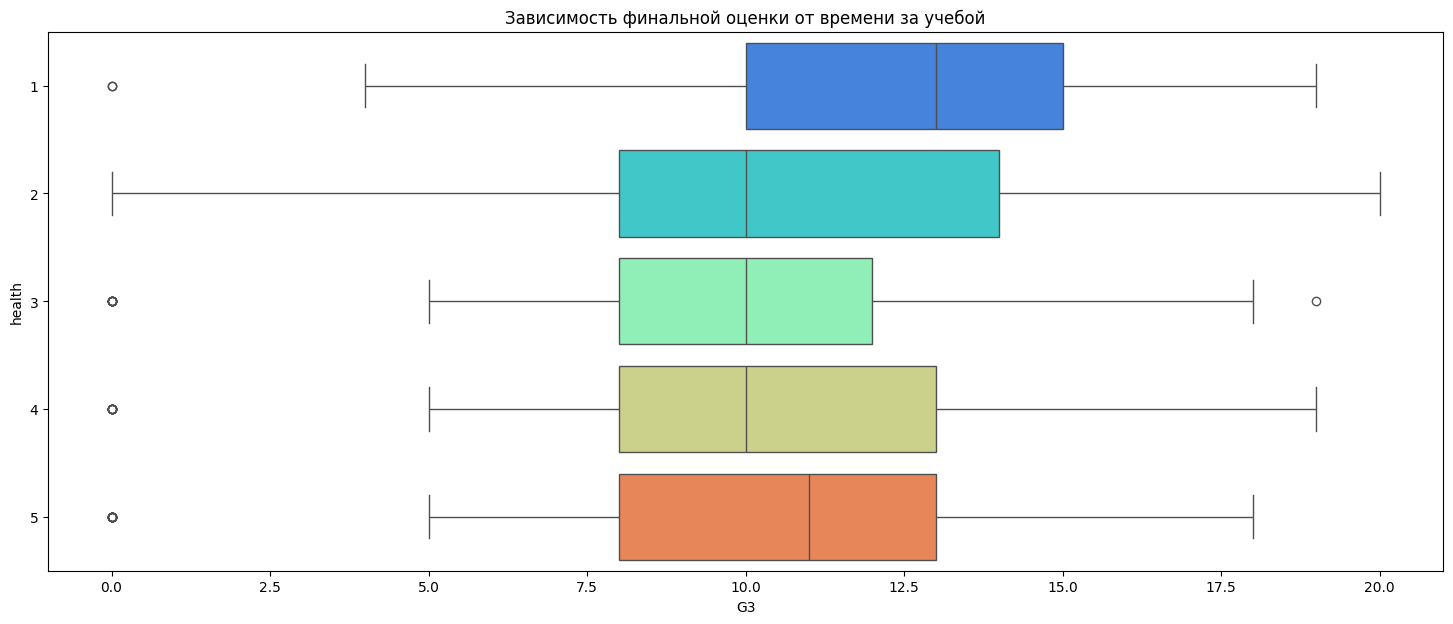

In [31]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от времени за учебой")
sns.boxplot(y="health", x="G3", data = study_time , orient="h", palette = 'rainbow')

На графике видно, что в погоне за оценками ученики жертвуют здоровьем. Но также видно, что у тех ребят, кто следит за своим здоровьем оценки в среднем лучше.

## Влияние употребления алкоголя на успеваемость ученика

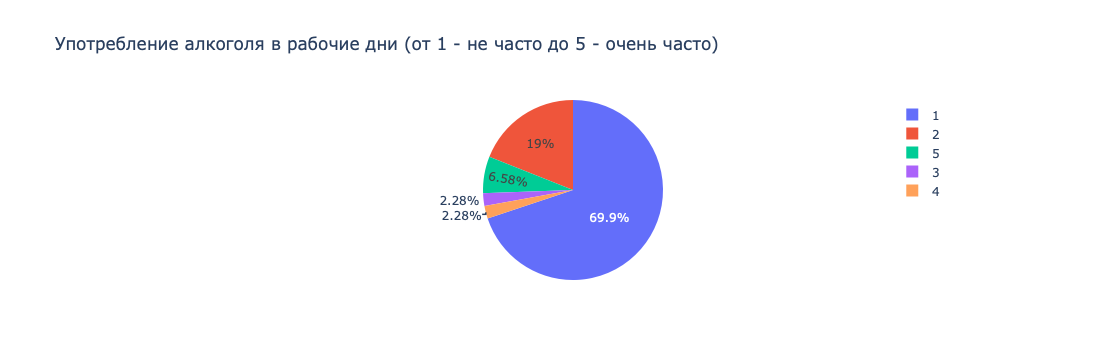

In [32]:
d_alco = train_math[["Dalc", "G3"]].copy()


labels = d_alco["Dalc"].unique().tolist()
counts = d_alco["Dalc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в рабочие дни (от 1 - не часто до 5 - очень часто)')

fig.show()

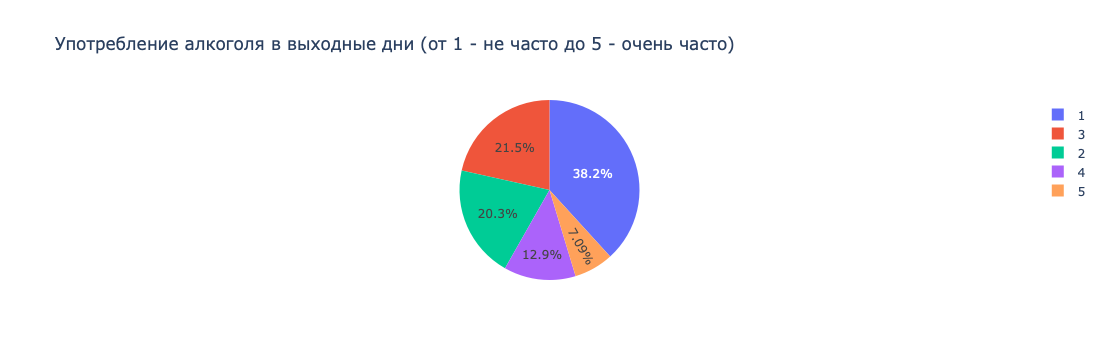

In [33]:
w_alco = train_math[["Walc", "G3"]].copy()

labels = w_alco["Walc"].unique().tolist()
counts = w_alco["Walc"].value_counts().tolist()


fig = go.Figure(data=go.Pie(labels=labels, values=counts))

fig.update_layout(title_text='Употребление алкоголя в выходные дни (от 1 - не часто до 5 - очень часто)')

fig.show()

/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/105045947.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/_t/bc40d_jj6qx8qtl_6vh6gmw40000gn/T/ipykernel_53352/105045947.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Зависимость финальной оценки от употребления алкоголя в выходные дни'}, xlabel='G3', ylabel='Walc'>

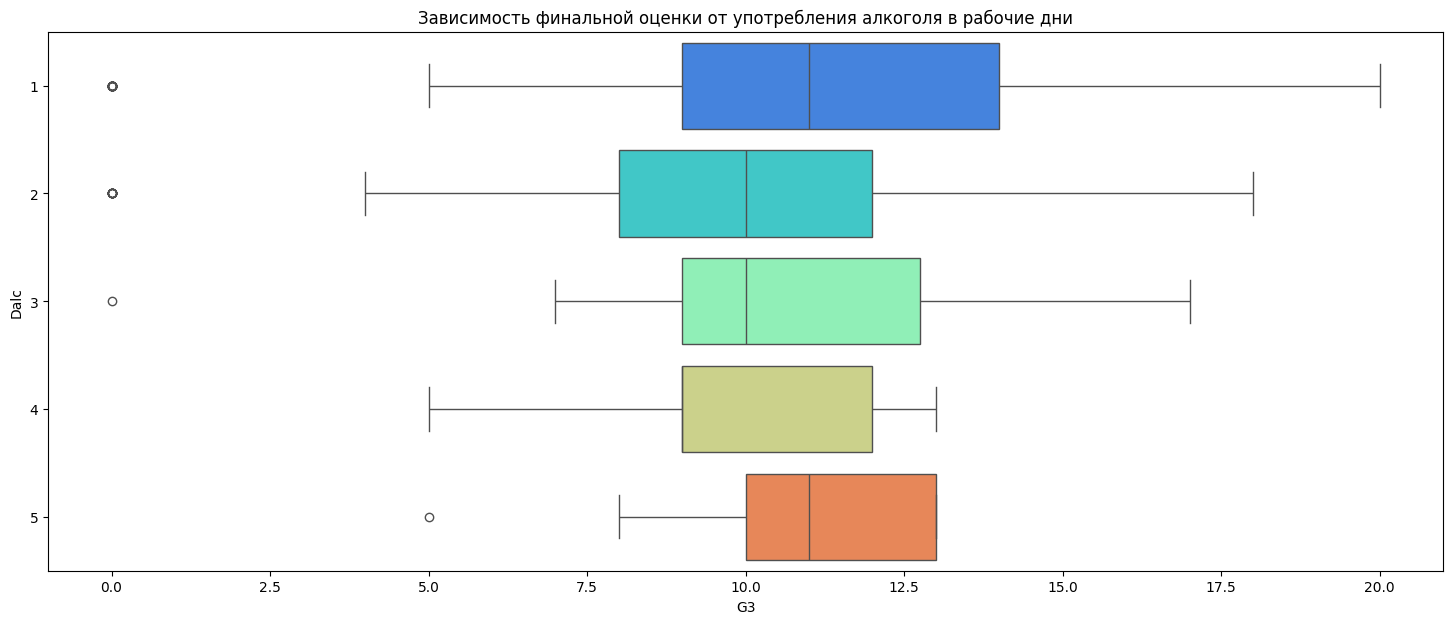

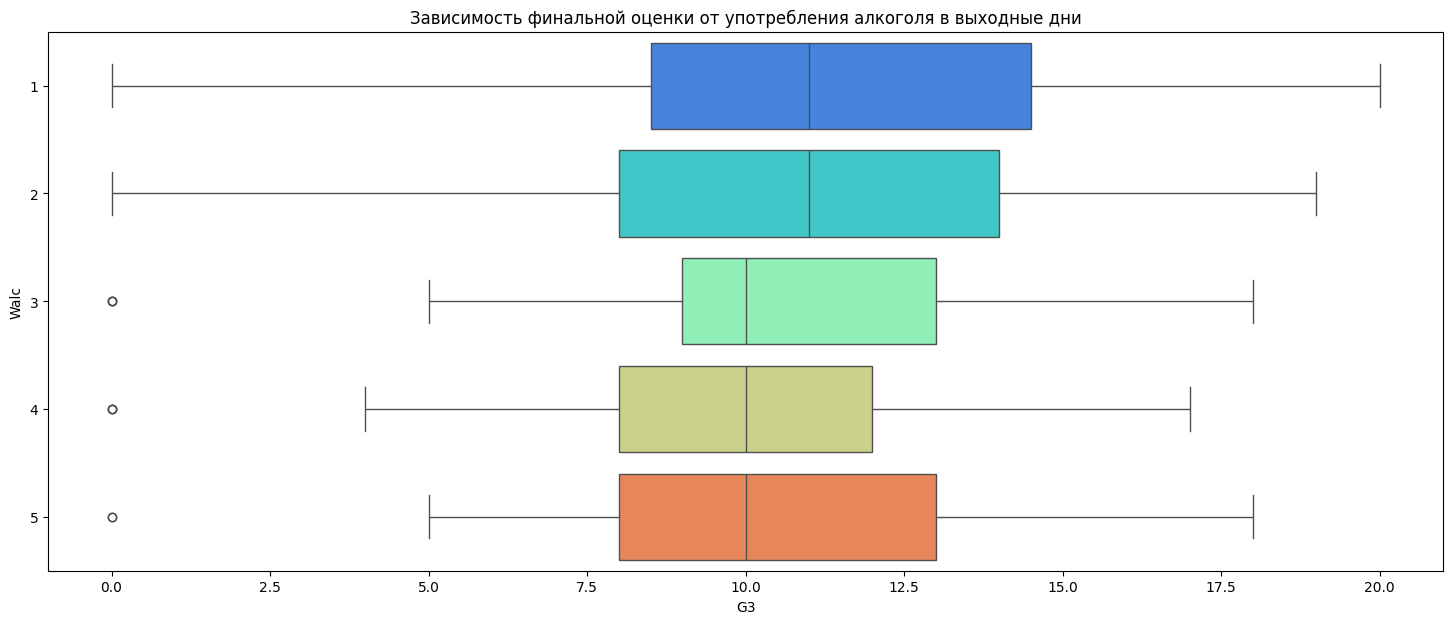

In [34]:
plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в рабочие дни")
sns.boxplot(y="Dalc", x="G3", data = d_alco, orient="h", palette = 'rainbow')

plt.figure(figsize=(18,7))
plt.title("Зависимость финальной оценки от употребления алкоголя в выходные дни")
sns.boxplot(y="Walc", x="G3", data = w_alco, orient="h", palette = 'rainbow')

Как видно из графиков выше, в рабочие дни большинство учеников употребляют алкоголь очень редко, хотя в выходные дни картина несколько отличается. Также видно, что чем реже ученик употребляет алкоголь, тем выше его итоговая оценка.

## Зависимость успеваемости от количества пропусков

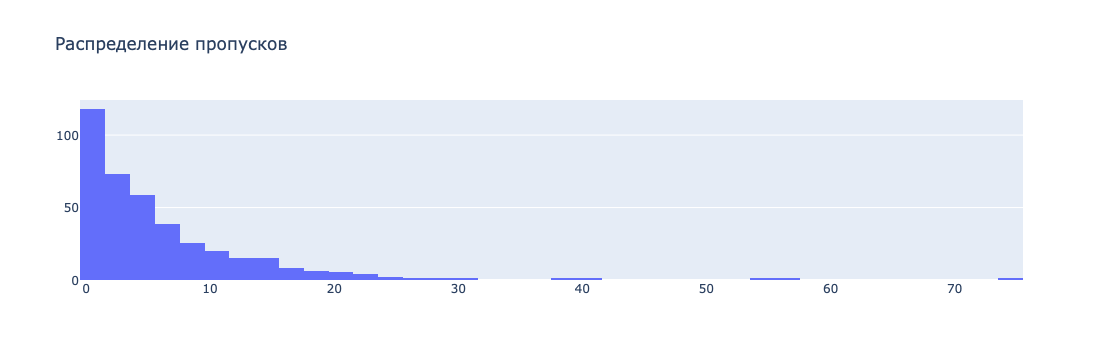

In [35]:
fig = go.Figure(data=[go.Histogram(x=train_math['absences'])])

fig.update_layout(title_text='Распределение пропусков')
fig.show()

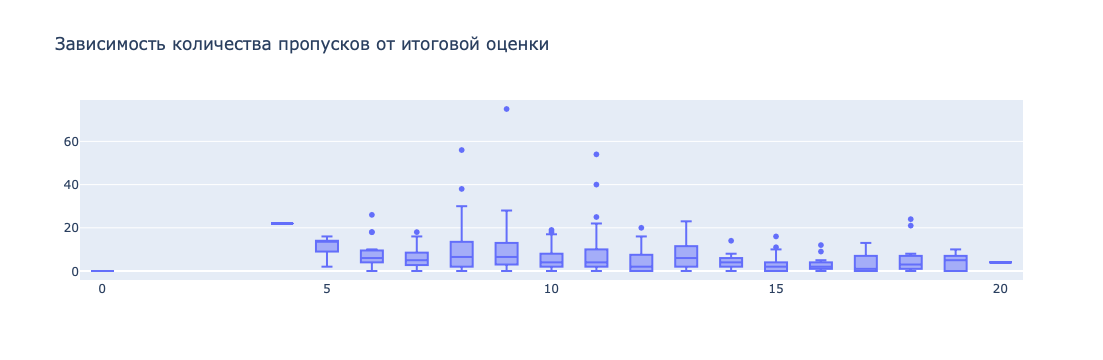

In [36]:
fig = go.Figure(data=[go.Box(x=train_math['G3'], y=train_math['absences'])])

fig.update_layout(title_text='Зависимость количества пропусков от итоговой оценки')

fig.show()

In [37]:
train_math[train_math['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,GP,M,18,R,GT3,T,2,2,services,other,...,3,3,3,1,2,4,0,7,4,0
130,GP,F,15,R,GT3,T,3,4,services,teacher,...,4,2,2,2,2,5,0,12,0,0
131,GP,F,15,U,GT3,T,1,1,at_home,other,...,4,3,3,1,2,4,0,8,0,0
134,GP,M,15,R,GT3,T,3,4,at_home,teacher,...,5,3,3,1,1,5,0,9,0,0
135,GP,F,15,U,GT3,T,4,4,services,at_home,...,4,3,3,1,1,5,0,11,0,0
136,GP,M,17,R,GT3,T,3,4,at_home,other,...,5,4,5,2,4,5,0,10,0,0
137,GP,F,16,U,GT3,A,3,3,other,other,...,4,3,2,1,1,5,0,4,0,0
140,GP,M,15,U,GT3,T,4,3,teacher,services,...,2,2,2,1,1,3,0,7,9,0
144,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,0,5,0,0
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0


**Вывод**<br>
Во время учебы в выходные и в будние дни лучше не употреблять алкоголь, если вы хотите получить оценку как можно лучше. Также занятие спортом, учеба 5-10 часов в неделю и как можно частое посещение занятий приблизят вас к высокой отметке.

# Преобразование признаков

In [38]:
data = pd.read_csv(DATA_FOLDER + "student-mat.csv")

def get_less_variative_columns(data, treshold=96):
    columns = []
    for column in data.columns:
        counts = data[column].value_counts()
        most_popular_count = counts.iloc[0]
        if (most_popular_count / len(data) * 100 >= treshold):
            columns.append(column)
    return columns
        
get_less_variative_columns(data)

[]

В нашем датасете нет колонок с достаточно низкой вариативностью

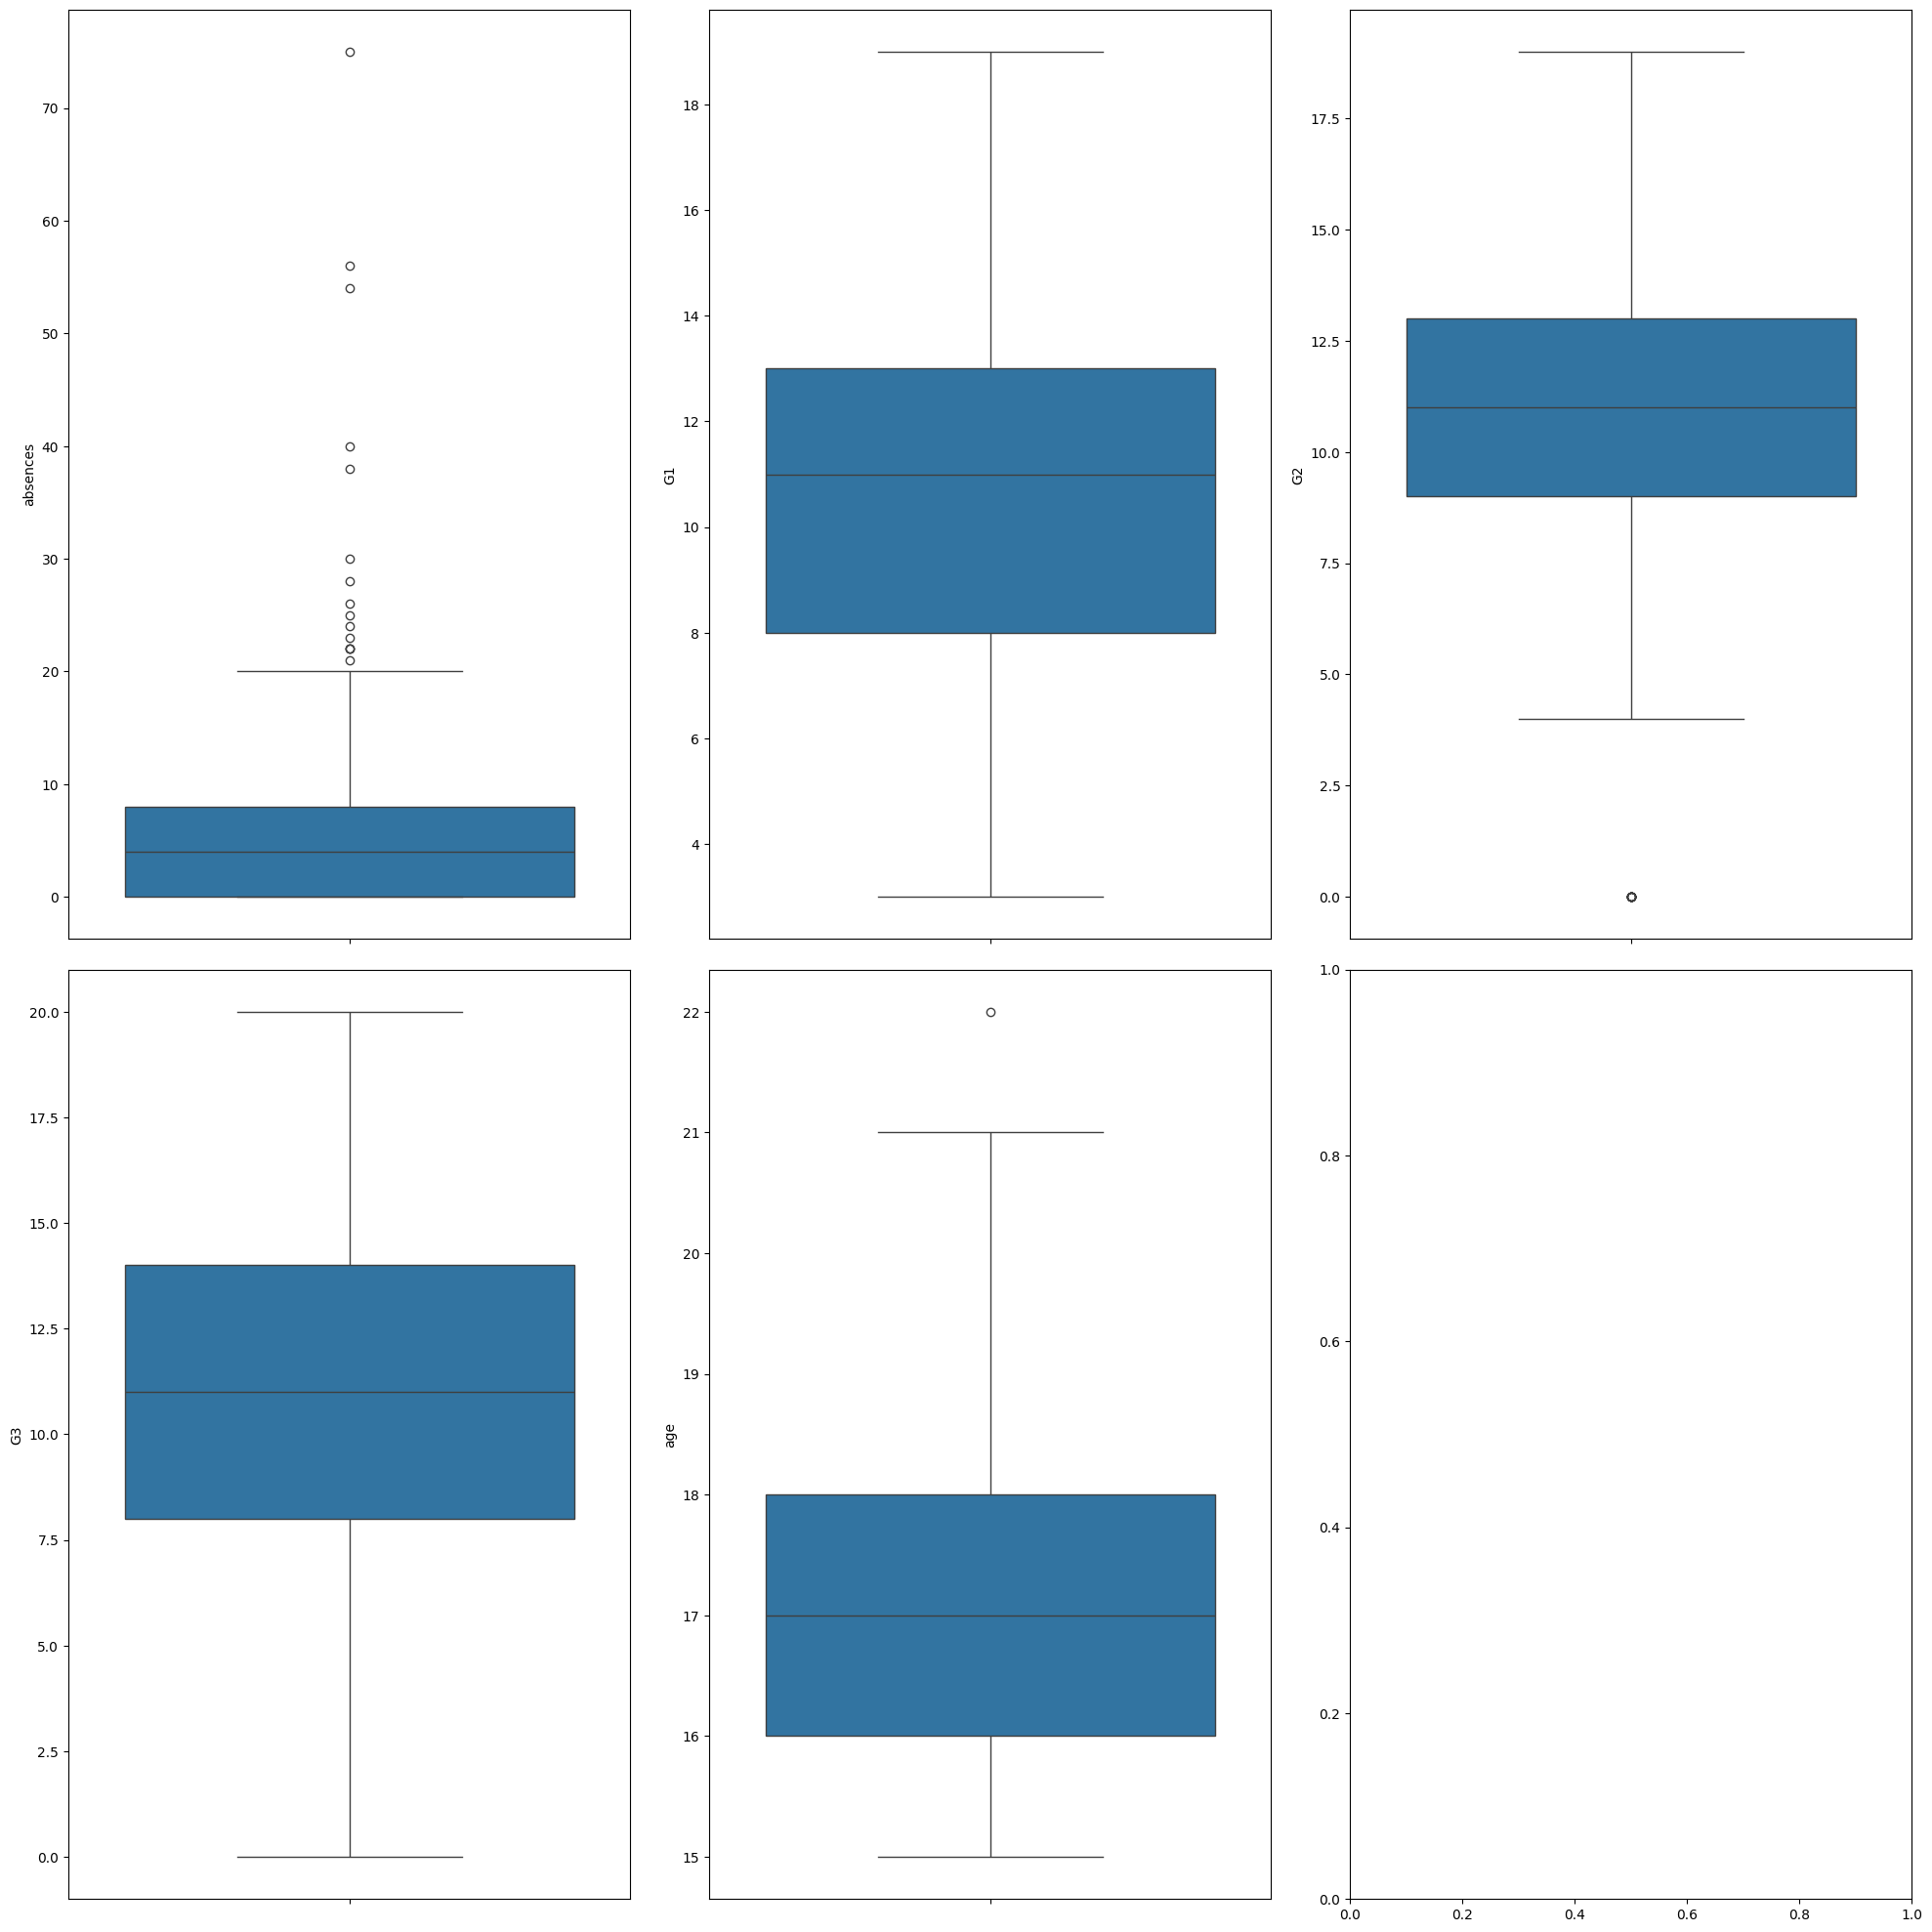

In [39]:
columns = ['absences', 'G1', 'G2', 'G3', 'age']

fig, axes = plt.subplots(round(len(columns)/3), 3, figsize=(20, 20))

y = 0
for col in columns:
    i, j = divmod(y, 3)
    sns.boxplot(y=data[col], data=data, ax=axes[i, j])
    y += 1
fig.tight_layout(pad=1.5)

In [40]:
data = data.drop(data[data['absences'] > 25].index)
data = data.drop(data[data['age'] > 20].index)

In [41]:
data = data.drop(data[data['G3'] == 0].index)

Для колонок с ответом yes/no заменим их на 1/0

In [42]:
def yes_no_to_bool(ans):
    if ans == 'yes':
        return 1
    else:
        return 0
    
columns_to_apply = ['schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic']

for column in columns_to_apply:
    data[column] = data[column].apply(yes_no_to_bool)

In [43]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['school', 'sex', 'address', 'famsize',
                    'Pstatus', 'Mjob', 'Fjob', 'reason',
                    'guardian']

for column in columns_to_encode:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [44]:
for column in data.columns:
    print(f'{column}: {data[column].unique()}')

school: [0 1]
sex: [0 1]
age: [18 17 15 16 19 20]
address: [1 0]
famsize: [0 1]
Pstatus: [0 1]
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: [0 1 2 3 4]
Fjob: [4 2 3 1 0]
reason: [0 2 1 3]
guardian: [1 0 2]
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: [1 0]
famsup: [0 1]
paid: [0 1]
activities: [0 1]
nursery: [1 0]
higher: [1 0]
internet: [0 1]
romantic: [0 1]
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 18 20 24  5 13 15 22  3 21  1 19  9 11
 23 17]
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  4]


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 [Text(0, 0.5, 'school'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'address'),
  Text(0, 4.5, 'famsize'),
  Text(0, 5.5, 'Pstatus'),
  Text(0, 6.5, 'Medu'),
  Text(0, 7.5, 'Fedu'),
  Text(0, 8.5, 'Mjob'),
  Text(0, 9.5, 'Fjob'),
  Text(0, 10.5, 'reason'),
  Text(0, 11.5, 'guardian'),
  Text(0, 12.5, 'traveltime'),
  Text(0, 13.5, 'studytime'),
  Text(0, 14.5, 'failures'),
  Text(0, 15.5, 'schoolsup'),
  Text(0, 16.5, 'famsup'),
  Text(0, 17.5, 'paid'),
  Text(0, 18.5, 'activities'),
  Text(0, 19.5, 'nursery'),
  Text(0, 20.5, 'higher'),
  Text(0, 21.5, 'internet'),
  Text(0, 22.5, 'romantic'),
  Text(0, 23.5, 'famrel'),
  Text(0, 24.5, 'freetime'),
  Text(0, 25.5, 'goout'),
  Text(0, 26.5, 'Dalc'),
  Text(0, 27.5, 'Walc'),
  Text(0, 28.5, 'health

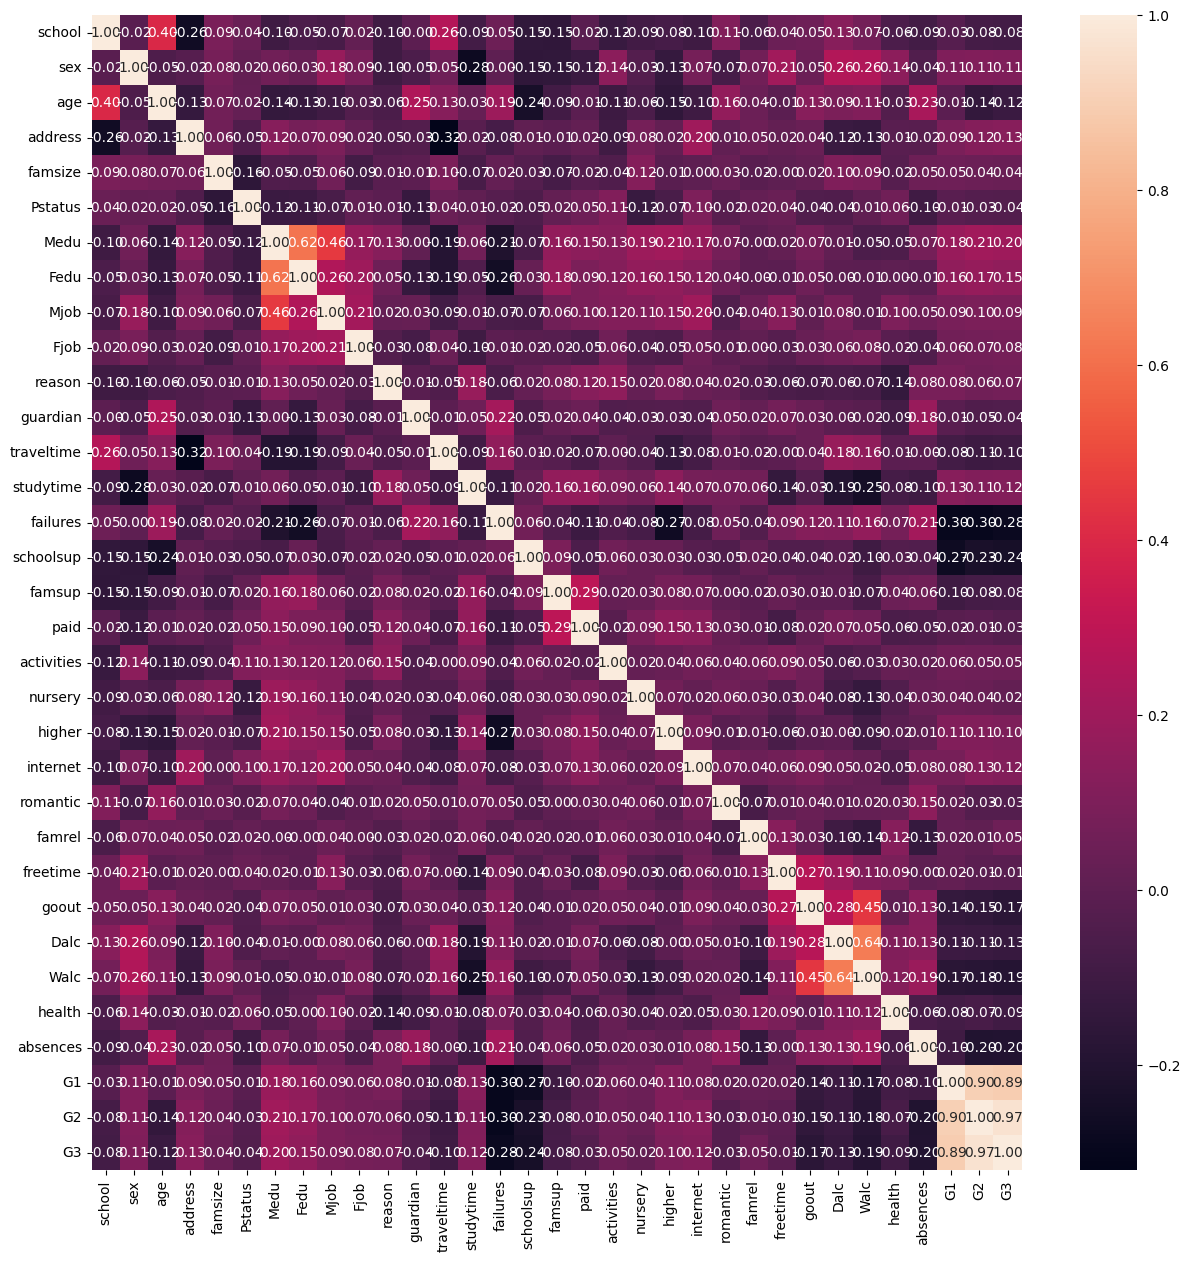

In [45]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(numeric_only=True),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [46]:
data['alc'] = data['Dalc'] + data["Walc"]

In [47]:
data = data.drop(columns=['G1', 'G2'])

# Обучение моделей

Ниже представлены формулы подсчета ошибок, которые использовались в оценке обученных моделей.

$ MSE = \dfrac{1}{N} \sqrt{\sum_{i=1}^{N} (y_{i}^{(true)} - y_{i}^{(pred)}) ^ 2} $

$ R2 = 1 - \dfrac{\sum_{i=1}^{N} (y_{i}^{(true)} - y_{i}^{(pred)}) ^ 2}{\sum_{i=1}^{N} (y_{i}^{(true)} - y^{(mean)}) ^ 2}{}, 
y^{(mean) = \dfrac{1}{N} \sum_{i=1}^{N} y_{i}^{(true)}}$

## SGD

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['G3']), data['G3'], test_size=0.15, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_squared_error, r2_score

drop_cols = ['Medu', 'school', 'Dalc', 'Walc']

models = [LinearRegression(), Ridge(), Lasso()]

for model in models:
    model.fit(X_train.drop(columns=drop_cols), y_train)

    y_pred = model.predict(X_test.drop(columns=drop_cols))

    print(str(model), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))


LinearRegression() 8.105778279595613 0.24355045889089444
Ridge() 8.040058651061738 0.2496835630952684
Lasso() 10.289861397786147 0.03972688816009007


In [50]:
from sklearn.model_selection import GridSearchCV

model = Ridge(random_state=42)

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols))

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(7.85889647440308, 0.266590026691088)

In [51]:
def mean_data(x, y):
    d = {}
    for i in range(len(x)):
        if x[i] not in d:
            d[x[i]] = []
        d[x[i]].append(y[i])
    return list(d.keys()), [sum(d[key])/len(d[key]) for key in d.keys()]

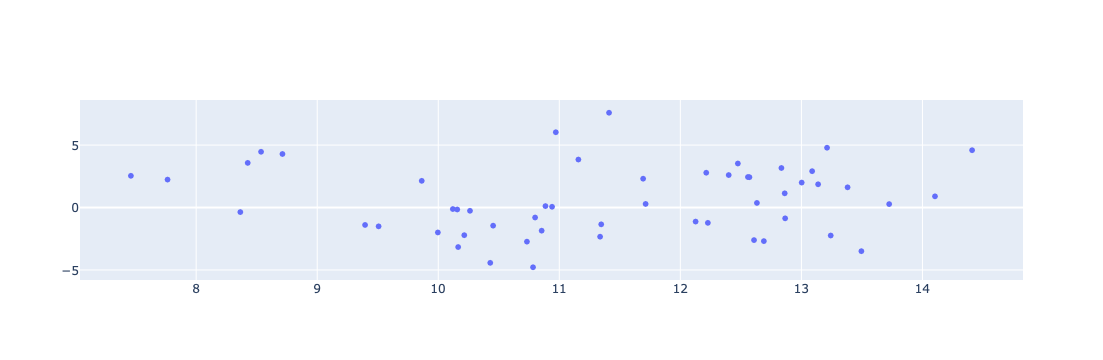

In [52]:
residuals = (y_test - y_pred).to_numpy()

x, y = mean_data(y_pred, residuals)

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers')])

fig.show()

In [53]:
model = Lasso(random_state=42)

parameters = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=drop_cols), y_train)

y_pred = grid_search.best_estimator_.predict(X_test.drop(columns=drop_cols))

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(8.042314023755852, 0.24947308662025947)

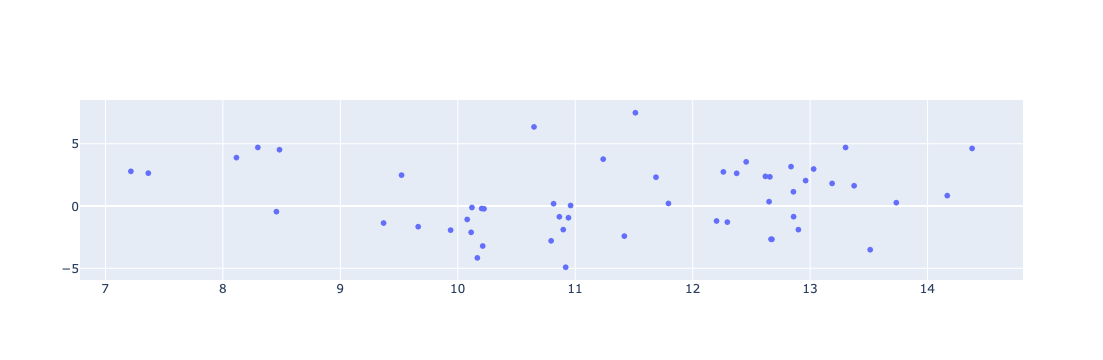

In [54]:
residuals = (y_test - y_pred).to_numpy()

x, y = mean_data(y_pred, residuals)

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers')])

fig.show()

In [55]:
lasso_reg = grid_search.best_estimator_

for i in np.argsort(np.abs(lasso_reg.coef_)):
    print(i, lasso_reg.coef_[i], X_train.drop(columns=drop_cols).columns[i])

22 0.0 freetime
16 0.03182965279834814 activities
6 0.035863722242725174 Mjob
9 0.04909982050718281 guardian
10 0.06208812584365144 traveltime
25 -0.07660545241064451 absences
7 0.11096307122905077 Fjob
8 0.11559419727562487 reason
26 -0.14149164709946432 alc
23 -0.15117278414362606 goout
21 0.1582589564553088 famrel
20 0.18701079793393474 romantic
1 -0.19756685109930966 age
24 -0.22666247738376716 health
3 0.2873138191227875 famsize
5 0.29813849239742396 Fedu
17 -0.3000483629002917 nursery
2 0.3130051142849755 address
14 -0.35215230737301245 famsup
18 0.3727545575017163 higher
11 0.4179579088821771 studytime
15 -0.44805416662445113 paid
0 0.5762793695572933 sex
19 0.6212247622643509 internet
4 -0.6922715491983151 Pstatus
12 -0.7029910229415246 failures
13 -2.6206971883529433 schoolsup


## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(16.60377358490566, -0.5495016611295682)

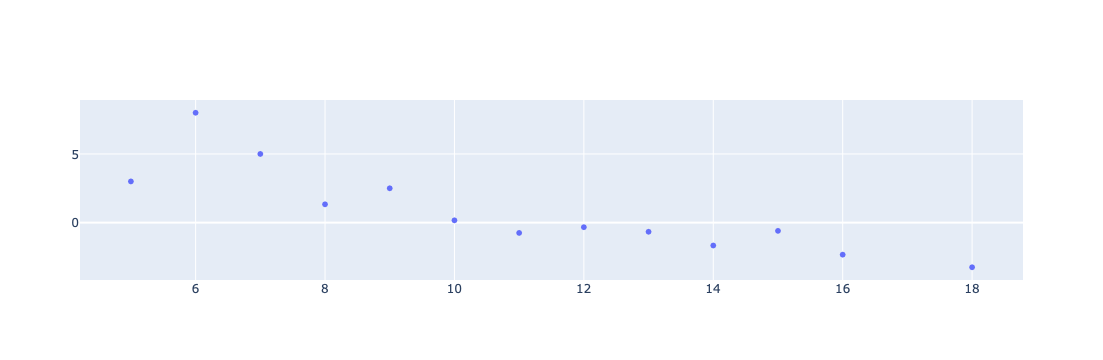

In [57]:
residuals = (y_test - y_pred).to_numpy()

x, y = mean_data(y_pred, residuals)

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers')])

fig.show()

[Text(0.7576151097074468, 0.975, 'x[15] <= 0.5\nsquared_error = 10.261\nsamples = 294\nvalue = 11.548'),
 Text(0.5950923710480971, 0.925, 'x[14] <= 0.5\nsquared_error = 10.081\nsamples = 259\nvalue = 11.861'),
 Text(0.3726839929202877, 0.875, 'x[6] <= 2.5\nsquared_error = 9.705\nsamples = 219\nvalue = 12.187'),
 Text(0.24689091998801319, 0.825, 'x[29] <= 11.0\nsquared_error = 7.062\nsamples = 81\nvalue = 11.272'),
 Text(0.19051543302367396, 0.775, 'x[7] <= 3.5\nsquared_error = 6.196\nsamples = 74\nvalue = 11.5'),
 Text(0.12091699130955949, 0.725, 'x[6] <= 0.5\nsquared_error = 5.89\nsamples = 68\nvalue = 11.309'),
 Text(0.11612226550794126, 0.675, 'squared_error = 0.0\nsamples = 2\nvalue = 15.0'),
 Text(0.1257117171111777, 0.675, 'x[1] <= 0.5\nsquared_error = 5.643\nsamples = 66\nvalue = 11.197'),
 Text(0.05364099490560383, 0.625, 'x[9] <= 2.5\nsquared_error = 4.547\nsamples = 33\nvalue = 10.576'),
 Text(0.0185795624812706, 0.575, 'x[25] <= 1.5\nsquared_error = 3.607\nsamples = 23\nvalu

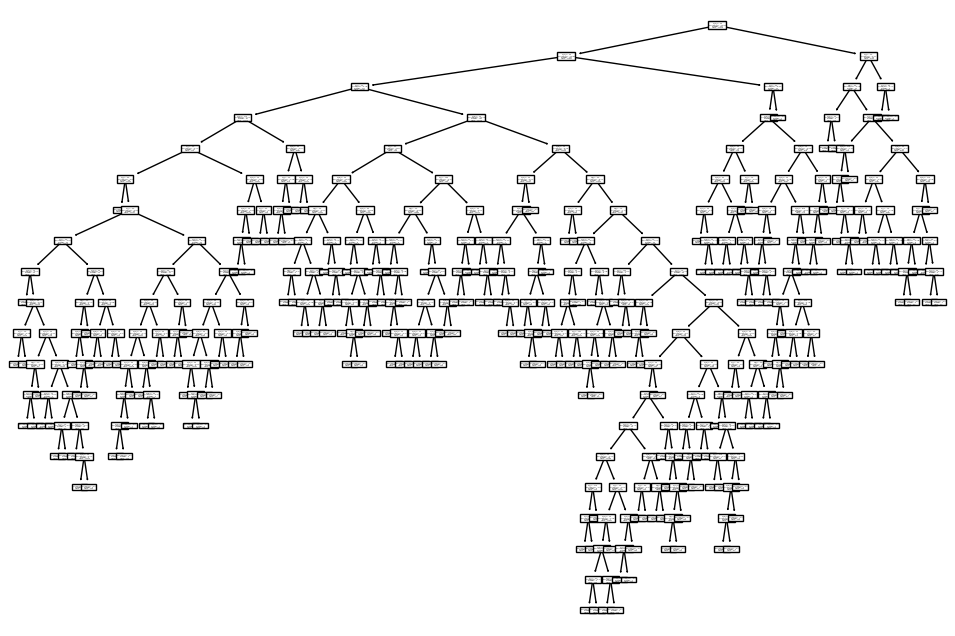

In [58]:
from sklearn import tree

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

tree.plot_tree(tree_reg, ax=ax)

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42).fit(X_train.drop(columns=['alc']), y_train)

y_pred = forest_reg.predict(X_test.drop(columns=['alc']))

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(7.469622641509433, 0.3029179401993355)

In [60]:
model = RandomForestRegressor(random_state=42)

parameters = {'n_estimators': [50, 100, 300], 
             'max_depth': [None, 5, 10, 20, 30],
             'max_features': [None, 'sqrt', 'log2']}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error')

grid_search.fit(X_train.drop(columns=['alc']), y_train)

y_pred = grid_search.best_estimator_.predict(X_test.drop(columns=['alc']))

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(7.40532075471698, 0.3089187375415282)

In [61]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}

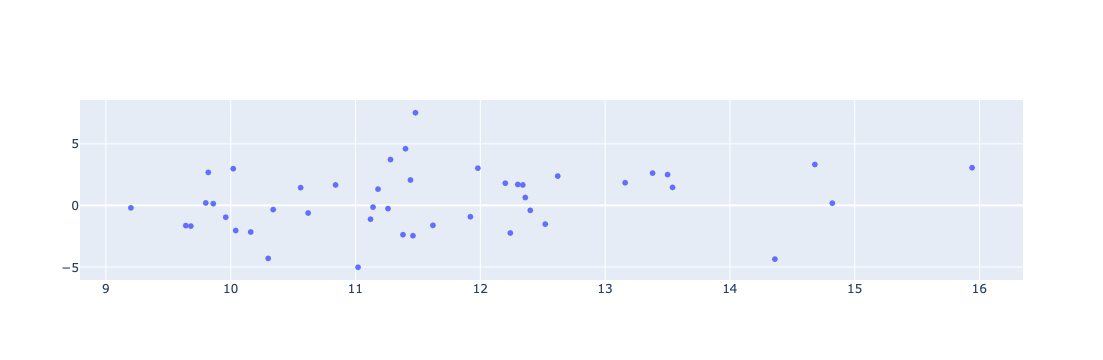

In [62]:
residuals = (y_test - y_pred).to_numpy()

x, y = mean_data(y_pred, residuals)

fig = go.Figure(data=[go.Scatter(x=x, y=y, mode='markers')])

fig.show()

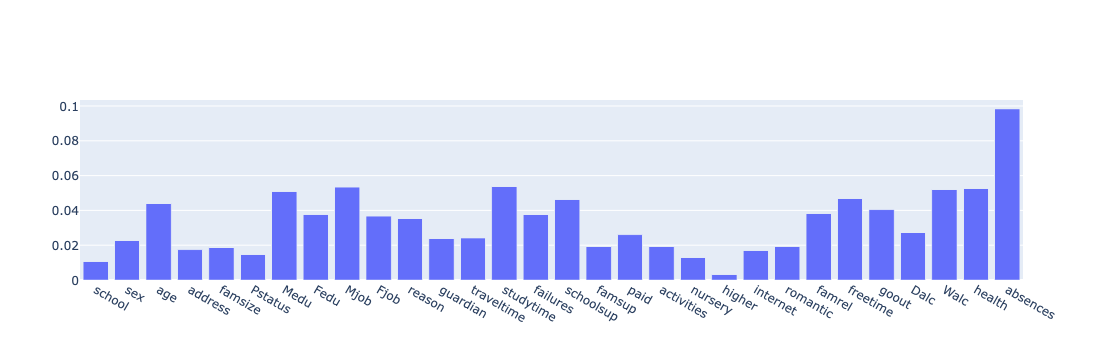

In [63]:
importances = grid_search.best_estimator_.feature_importances_

fig = go.Figure([go.Bar(x=X_train.columns, y=importances)])
fig.show()

In [64]:
from sklearn.dummy import DummyRegressor

regressor_mean = DummyRegressor(strategy='mean')
regressor_mean.fit(X_train, y_train)

y_pred = regressor_mean.predict(X_test)

mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(10.887487699482312, -0.01604494843341575)